In [2]:
# Let's import the relevant Python packages here
# Feel free to import any other packages for this project

# Data Wrangling
import pandas as pd
import numpy as np

# Statistics
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Plotting
import matplotlib.pyplot as plt

%matplotlib inline

weekly = pd.read_csv("Weekly.csv")
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [10]:
# First we encode the qualitative variable direction into a binary 1 for Up 0 for Down
encode = lambda x: 1 if x == "Up" else 0

weekly["Direction"] = weekly["Direction"].apply(encode)
weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1


               Year      Lag1      Lag2      Lag3      Lag4      Lag5  \
Year       1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519   
Lag1      -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183   
Lag2      -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499   
Lag3      -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657   
Lag4      -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675   
Lag5      -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000   
Volume     0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517   
Today     -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013   
Direction -0.022200 -0.050004  0.072696 -0.022913 -0.020549 -0.018168   

             Volume     Today  Direction  
Year       0.841942 -0.032460  -0.022200  
Lag1      -0.064951 -0.075032  -0.050004  
Lag2      -0.085513  0.059167   0.072696  
Lag3      -0.069288 -0.071244  -0.022913  
Lag4      -0.061075 -0.007826  -0.020549  
Lag5      -

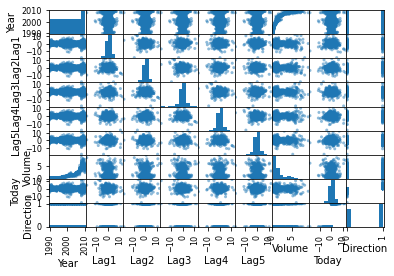

In [12]:
# plot matrix of pairwise scatter plots to see relationships in the data
axes = pd.plotting.scatter_matrix(weekly)
print(weekly.corr())

In [13]:
# there appears to be a correlation between year and volume. 
# No other clear relationship between the variable

In [43]:
# run a logistic regression
fit1 = smf.glm("Direction~ Lag1+Lag2+Lag3+Lag4+Lag5", data= weekly, family=sm.families.Binomial()).fit()
print(fit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1083
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.37
Date:                Tue, 09 Feb 2021   Deviance:                       1486.7
Time:                        21:33:04   Pearson chi2:                 1.09e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2303      0.062      3.712      0.0

In [17]:
#Only lag2 is significant at the 95% confidence level

In [24]:
# find the predictions for each variable
encode = lambda x: 1 if x > 0.5 else 0
predictions = pd.DataFrame({"Direction" : [encode(x) for x in fit1.predict()]})
predictions.head()

,Direction
0,1
1,1
2,1
3,0
4,1


In [39]:
# accuracy rate for predictions
from sklearn.metrics import accuracy_score
fraction_correct_all = 100 * accuracy_score(weekly["Direction"], predictions["Direction"])

fraction_correct_all

56.29017447199265

In [40]:
# Train and test split
train_filter_list =["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007"]
test_filter_list =["2008","2009","2010"]

train = weekly[weekly["Year"].isin(train_filter_list)]
test = weekly[weekly["Year"].isin(test_filter_list)]

print(train)
print(test)

     Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today  Direction
0    1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270          0
1    1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576          0
2    1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514          1
3    1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712          1
4    1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178          1
..    ...    ...    ...    ...    ...    ...       ...    ...        ...
928  2007  2.807 -1.237  0.347 -3.706 -1.669  4.096428  1.588          1
929  2007  1.588  2.807 -1.237  0.347 -3.706  3.415362 -2.440          0
930  2007 -2.440  1.588  2.807 -1.237  0.347  3.702056  1.125          1
931  2007  1.125 -2.440  1.588  2.807 -1.237  3.745900 -0.402          0
932  2007 -0.402  1.125 -2.440  1.588  2.807  2.016050 -4.522          0

[933 rows x 9 columns]
      Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today  Direction
933   2008 -4.522 -0.402  

In [48]:
# fit regression with training data from 1990 to 2007
fit2 = smf.glm("Direction~ Lag2", data= train, family=sm.families.Binomial()).fit()
print(fit2.summary())

# find the predictions for each line in the test set
yprobs = fit2.predict(test["Lag2"])
print("-------")
print(yprobs)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                  933
Model:                            GLM   Df Residuals:                      931
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -639.25
Date:                Tue, 09 Feb 2021   Deviance:                       1278.5
Time:                        21:35:23   Pearson chi2:                     933.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2266      0.066      3.422      0.0

In [50]:
# calculate predictions on test set
ypred = [0 if y<0.5 else 1 for y in yprobs]


# print accuracy score
print(accuracy_score(test["Direction"],ypred))

0.5512820512820513


In [53]:
# run another logistic regression with a new variable
encode = [lambda x: 1 if x>0.5 else 0]
weekly["Response"] = weekly["Today"].apply(encode)
weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,y_i,Response
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0,0,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0,0,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1,1,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1,1,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1,1,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1,1,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1,0,0
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1,1,1


In [55]:
# Train and test split
train_filter_list =["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008"]
test_filter_list =["2009","2010"]

train = weekly[weekly["Year"].isin(train_filter_list)]
test = weekly[weekly["Year"].isin(test_filter_list)]

# fit regression with training data from 1990 to 2007
fit3 = smf.glm("Response~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume", data= train, family=sm.families.Binomial()).fit()
print(fit3.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Response   No. Observations:                  985
Model:                            GLM   Df Residuals:                      978
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -671.06
Date:                Tue, 09 Feb 2021   Deviance:                       1342.1
Time:                        21:53:54   Pearson chi2:                     985.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0780      0.094     -0.831      0.4

In [58]:
# find the predictions for each line in the test set
yprobs = fit3.predict(test)
print("-------")
print(yprobs)

-------
985     0.274179
986     0.478373
987     0.358876
988     0.323691
989     0.330751
          ...   
1084    0.400585
1085    0.305142
1086    0.375705
1087    0.366345
1088    0.379430
Length: 104, dtype: float64


In [59]:
# calculate predictions on test set
ypred = [0 if y<0.5 else 1 for y in yprobs]


# print accuracy score
fraction_correct = accuracy_score(test["Response"],ypred)
fraction_correct

0.5